In [1]:
import os
os.getcwd()

'C:\\Users\\Siddharth\\jupyter notebooks'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train.csv',parse_dates=True)
sales_grouped=df.groupby(['Store'])['Sales'].sum()
sns.set()
print(df.shape)
print(df.head())

sales_grouped.columns=['Total Sales']
print(sales_grouped.head())
print(df.info())
print(df[['Sales','Customers']].describe())
plt.hist(sales_grouped,bins=20)
plt.show()

C:\Users\Siddharth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Store
1    3716854
2    3883858
3    5408261
4    7556507
5    3642818
Name: Sales, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non

<Figure size 640x480 with 1 Axes>

(array([ 68., 183., 240., 236., 160., 107.,  53.,  27.,   8.,  11.,   7.,
          5.,   1.,   4.,   1.,   0.,   1.,   2.,   0.,   1.]),
 array([ 2114322.,  2984448.,  3854574.,  4724700.,  5594826.,  6464952.,
         7335078.,  8205204.,  9075330.,  9945456., 10815582., 11685708.,
        12555834., 13425960., 14296086., 15166212., 16036338., 16906464.,
        17776590., 18646716., 19516842.]),
 <a list of 20 Patch objects>)

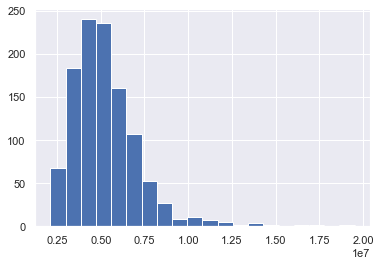

In [3]:
plt.hist(sales_grouped,bins=20)

In [7]:
other_features=pd.read_csv('store.csv')
print(other_features.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [5]:
overall=pd.merge(df,other_features,how='left',on='Store')
print(overall.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


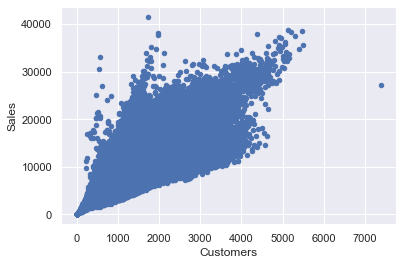

In [12]:
overall.plot.scatter(x='Customers',y='Sales')
plt.show()

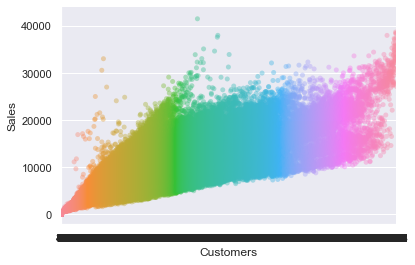

In [13]:
sns.stripplot(x='Customers', y='Sales', data=overall, jitter=True, edgecolor='none', alpha=.40)
sns.despine()

In [24]:
oa=pd.merge(sales_grouped,other_features,how='left',on='Store')
oa1=oa.dropna(subset=['CompetitionDistance'])
print(oa.head())

   Store    Sales StoreType Assortment  CompetitionDistance  \
0      1  3716854         c          a               1270.0   
1      2  3883858         a          a                570.0   
2      3  5408261         a          a              14130.0   
3      4  7556507         c          c                620.0   
4      5  3642818         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3   

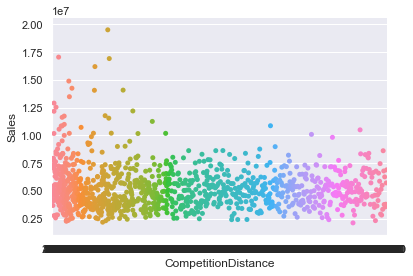

In [17]:
sns.stripplot(x='CompetitionDistance', y='Sales', data=oa, jitter=True, edgecolor='none')
sns.despine()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


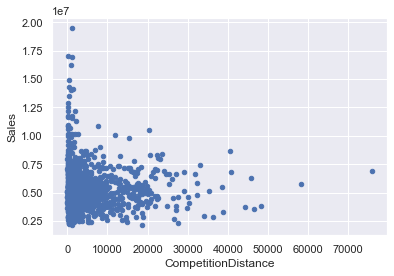

In [25]:
oa1.plot.scatter(x='CompetitionDistance', y='Sales')
plt.show()

In [28]:
corr_mat=oa1.corr()

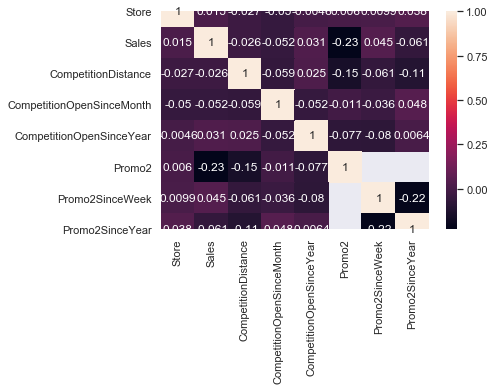

In [29]:
sns.heatmap(corr_mat,annot=True)

In [4]:
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.strftime('%b')

In [6]:
print(df.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday month  
0              1   Jul  
1              1   Jul  
2              1   Jul  
3              1   Jul  
4              1   Jul  


In [8]:
overall1=pd.merge(df,other_features,how='left',on='Store')
print(overall1.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday month StoreType Assortment  CompetitionDistance  \
0              1   Jul         c          a               1270.0   
1              1   Jul         a          a                570.0   
2              1   Jul         a          a              14130.0   
3              1   Jul         c          c                620.0   
4              1   Jul         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0  

In [10]:
for index, row in overall1.iterrows():
    if(row['month'] in row['PromoInterval']):
        overall1['Promo2appl']='Yes'
    else:
        overall1['Promo2appl']='No'
        
print(overall1.head())

TypeError: argument of type 'float' is not iterable

In [14]:
import numpy as np
overall1['Promo2appl'] = np.where(overall1['month'] in overall1['PromoInterval'], 
                                           'yes', 'no')
#overall1['Promo2appl']=overall1.apply(lambda x: x.month in x.PromoInterval, axis=1)
print(overall1.head())

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [16]:
def promo2(x):
    return 'yes' if x['month'] in x['PromoInterval'] else 'no'

overall1['Promo2appl'] = overall1.apply(promo2, axis=1)
    

TypeError: ("argument of type 'float' is not iterable", 'occurred at index 0')